# Set Up

In [169]:
import pandas as pd
import numpy as np
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use("seaborn")

C:\Users\leopo\AppData\Local\Temp\ipykernel_32108\2608210481.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
import spotiscience as sps

# Credentials

In [3]:
U2FsdGVkX1/KTh90tBvTvZIJdBzcnGVNAubbAFvlazQeTShbHkcNyab0KTRKlpmDh5oCMto/phIv+TlB
SkakdYwTOBZiNPLBO4h/cimgkXr1IvcNIg+j++M0pn0BD7abvs3ov/u6YqGJuiN/DU0Kguc5uw1ufceh
t9xgZeWDXB627ndTIhs0+gz6NZBxc8yfzaNxu5wpJA1oYy59sgyavsSLZjGDzo5v6ga4tFLffHAtRBMq
IQrUyIZlJ1ZPP4lWinqH721yZrckspEJMQR99TO9Iz/qdrgRKVFYzjxNj5DwXZHoiVm4aiZ20kzxb0NS
fYmFeoD7F+hKnVd19HCQR6FduT4y0L9yUWdIv5SxshN5MxbC4oHYfOM6m+MROs9Y

# Downloader

## Set Up

In [4]:
#create a dictionary with authorization keys
CREDENTIALS = {}
CREDENTIALS['client_id'] = client_id
CREDENTIALS['client_secret'] = client_secret
CREDENTIALS['redirect_url'] = redirect_url
CREDENTIALS['user_id'] = userid
CREDENTIALS['genius_access_token'] = genius_access_token # genius is optional, only

"""You also can set your credentials id on credentials.py and import from spotiscience"""

# returns 'downloader class'
sd = sps.downloader.SpotiScienceDownloader(credentials=CREDENTIALS)


## Playlist download

In [5]:
#Return song features of playlist
playlist = 'https://open.spotify.com/playlist/1UseUQhEDVhhHwfXxiVzP2?si=11a972b658a449c1'
len_playlist=50
playlist_data = sd.get_playlist_song_features(playlist_id=playlist,n_songs=len_playlist)

Playlist fusion downloaded!


In [6]:
song = playlist_data['fusion'][0]

## Artist info

In [7]:
# On peut obtenir des informations des artistes directement
# problème : demande à chaque fois l'autorisation so meh for automatisation
artist = 'metallica'
sd.get_artist_information(artist=artist)

{'artists': {'href': 'https://api.spotify.com/v1/search?query=metallica&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2ye2Wgw4gimLv2eAKyk1NB'},
    'followers': {'href': None, 'total': 22801708},
    'genres': ['hard rock',
     'metal',
     'old school thrash',
     'rock',
     'thrash metal'],
    'href': 'https://api.spotify.com/v1/artists/2ye2Wgw4gimLv2eAKyk1NB',
    'id': '2ye2Wgw4gimLv2eAKyk1NB',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5eb8101d13bdd630b0889acd2fd',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab676161000051748101d13bdd630b0889acd2fd',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f1788101d13bdd630b0889acd2fd',
      'width': 160}],
    'name': 'Metallica',
    'popularity': 81,
    'type': 'artist',
    'uri': 'spotify:artist:2ye2Wgw4gimLv2eAKyk1NB'}],
  'limit': 1,
  'next': 'http

# Prediction : mood and topics, examples on one song

In [8]:
# returns 'predicter class'
sp = sps.SpotiSciencePredicter()

## Mood

In [9]:
#returns the tag of mood 
mood = sp.predict_song_mood(song=song)
song['mood'] = mood

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 1.1.3. This might lead 

## Get Song Genre

In [10]:
genre = sd.get_song_music_genre(song_id=song['id'])
song['genre'] = genre

## Lyrics topics prediction

### Get Lyrics

In [ ]:
lyrics = sd.get_song_lyrics(songname=song['name'],artistname=song['artist'])

The topic prediction of song lyrics uses any of the algorithms Latent Dirichlet Allocation Model (LDA), Non Negative Matrix Factorization Model (NMF) or Latent Semantic Indexing Model (LSI). To do this, I based my code on the following article which you can read here.

To predict the topic of lyrics you must configure the following parameters:

lyric = the lyric of the song

model = the model to use [options are “lsi”,”lda” or “nmf”]

lang = language of the song lyric [options are “english” or “spanish”]

n_grams = number of subsence of words to group

n_topics = number of returned topics

top_n = number of words per returned topic

For more information about the parameter n_grams, you can read the official documentation about vectorization with sklearn by clicking here

## Recognize language and topics

There is a necessity to add errors handling for topics : not every song has lyrics avaible, nor every lyrics is in french, english, spanish or german.

In [ ]:
langues = {
    'en' : 'english',
    'fr' : 'french',
    'es': 'spanish',
    'de': 'german'
}

In [ ]:
lyrics = sd.get_song_lyrics(songname=song['name'],artistname=song['artist'])
model = 'lda' # (available type 'lda', 'lsi', 'nmf')
lang = languages[detect(lyrics)] # (available type 'english','spanish', 'french', 'german')
# check for the last one.
# using langdetect detect function to identify the language
# need to had a error gestion regarding the language, if the lyrics can't be identify in those
# or install the core relevant to the language
n_grams = (1,1)
n_topics = 1
top_n = 5
topics = sp.predict_topic_lyric(lyrics,model,lang,n_grams,n_topics,top_n)
song['topics'] = topics

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


defaultdict(list,
            {'Topic 0:': [[('bone', 4.41991888513177),
               ('body', 2.8039771919426677),
               ('break', 2.7698478850430925),
               ('come', 1.9894166880141686),
               ('try', 1.9565224470565998),
               ('mountain', 1.2065403807567638),
               ('needle', 1.1967279844347747),
               ('meaning', 1.193678541518933),
               ('eye', 1.181337183969211),
               ('blue', 1.171405527554313)]],
             'Topic 1:': [[('alive', 1.187790728353454),
               ('suddenly', 1.1861348640317808),
               ('bury', 1.1795919867150366),
               ('good', 1.1766258966207472),
               ('silence', 1.174942167618257),
               ('reality', 1.1663703932788427),
               ('hit', 1.1532319537295035),
               ('change', 0.4616988114555919),
               ('likeembed', 0.4261922618870541),
               ('foot', 0.4104149238122401)]],
             'Topic 2:': [[('ooh', 2

# Example on a whole playlist

In [59]:
sp = sps.SpotiSciencePredicter()

In [252]:
languages = {
    'en' : 'english',
    'fr' : 'french',
    'es': 'spanish',
    'de': 'german'
}
name = 'fusion' # name of the playlist u want to extract the predictions from
len_playlist = 828

In [254]:
#Return song features of playlist
playlist = 'https://open.spotify.com/playlist/1UseUQhEDVhhHwfXxiVzP2?si=11a972b658a449c1'
playlist_data = sd.get_playlist_song_features(playlist_id=playlist,n_songs=len_playlist)

Playlist fusion downloaded!


In [255]:
for song in playlist_data[name]:

    mood = sp.predict_song_mood(song=song)
    song['mood'] = str(mood)

    genre = sd.get_song_music_genre(song_id=song['id'])
    song['genre'] = genre
    

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 1.1.3. This might lead 

In [256]:
df_playlist = pd.DataFrame.from_records(playlist_data[name])

In [257]:
collected_genre = df_playlist['genre'].sum()

<AxesSubplot: >

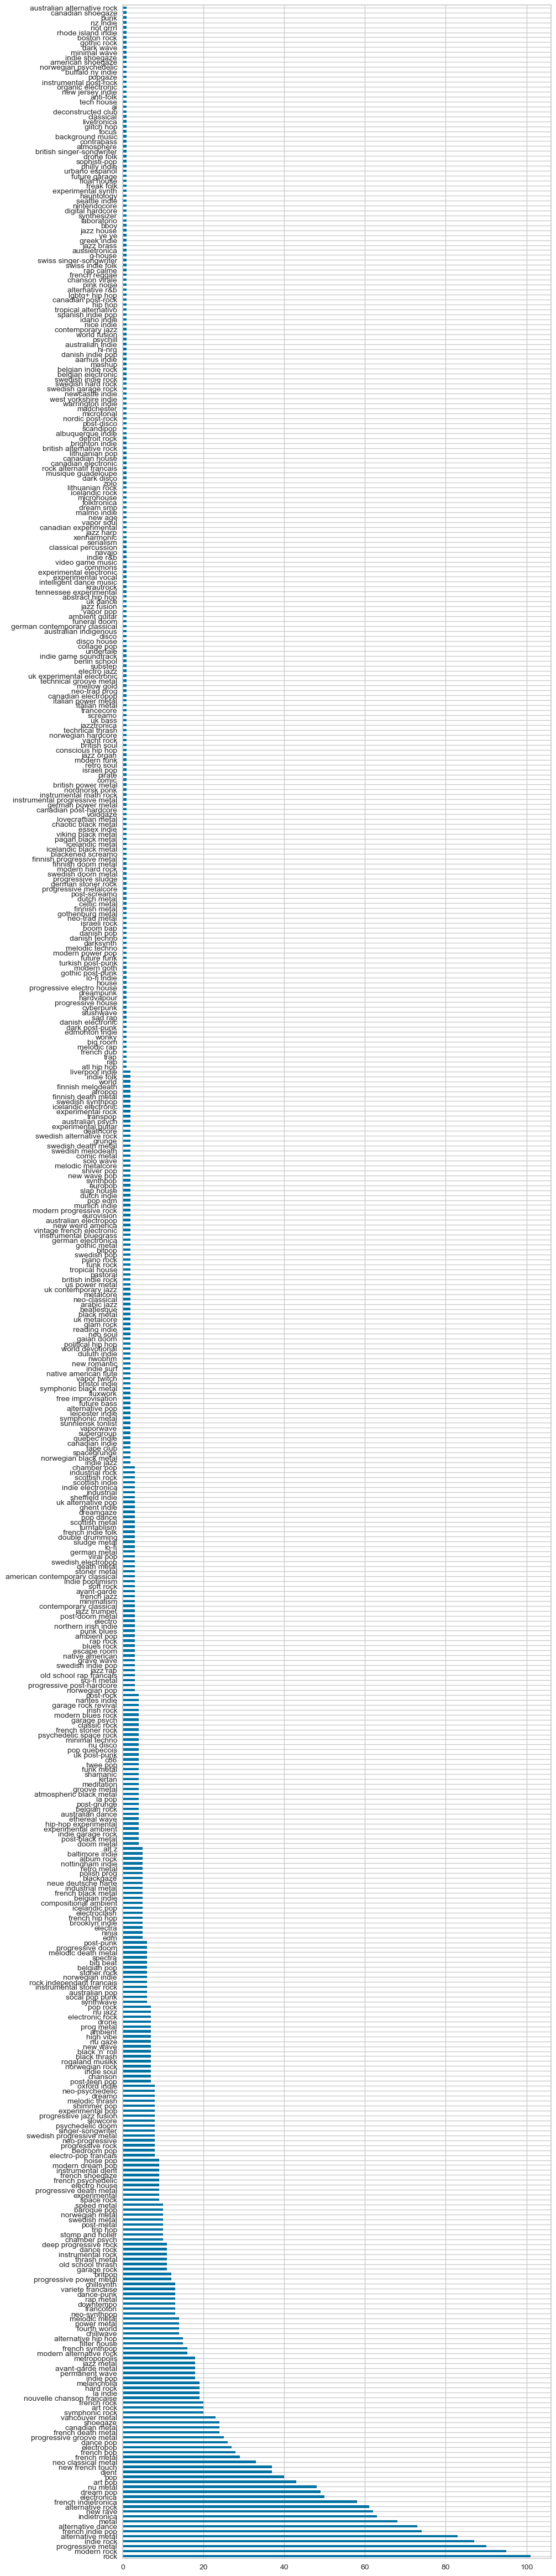

In [260]:
fig = plt.figure()
fig.set_size_inches(10,60)
pd.Series(collected_genre).value_counts().plot.barh()

On retient en genre les suivants :
- jazz ou funk
- pop
- electro ou techno ou club ou tronica
- synth
- rock
- prog ou exp
- alt
- dance, rave


In [261]:
selfdefined_genre = ['jazz,funk','pop','electro,techno,club,tronica','synth,dream','rock','prog,exp','alt,modern','dance,rave']
for genre in selfdefined_genre:
    df_playlist[genre] = ''

In [262]:
# identification of the song 49 (50th) to the chosen genres
song = df_playlist.iloc[49]
print(song['genre'])
for genre in selfdefined_genre:
    subgenre = genre.split(',')
    b = False
    for sub in subgenre:
        for song_genre in song['genre']:
            b = b or (sub in song_genre) #we test if in the str of the genre of the song we find an occurence of our subgenre
    print(genre, b)

['arabic jazz', 'french jazz', 'jazz trumpet']
jazz,funk True
pop False
electro,techno,club,tronica False
synth,dream False
rock False
prog,exp False
alt,modern False
dance,rave False


In [263]:
# identification for every song
for genre in selfdefined_genre:
    rows_in_genre = []
    for song_genre in df_playlist['genre']:
        subgenre = genre.split(',')
        b = False
        for sub in subgenre:
            for song_subgenre in song_genre:
                b = b or (sub in song_subgenre) #we test if in the str of the genre of the song we find an occurence of our subgenre
        rows_in_genre.append(b)
    df_playlist[genre] = rows_in_genre


In [264]:
df_playlist.sample(3)

,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,mood,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave"
196,0skrV9aO4qoM8VFkW7Rd7d,This Insatiable Love,Kid Francescoli,Play Me Again,2017-03-03,41,242830,0.0177,0.282,0.549,...,calm,"[electronica, french indie pop, french indietr...",False,True,True,False,False,False,False,False
726,5mYCufsakzLTcG9ZnKVeT4,Affinity.exe,Haken,Affinity (Deluxe Edition),2016-04-29,8,84120,0.9020,0.418,0.620,...,happy,"[deep progressive rock, jazz metal, progressiv...",True,False,False,False,True,True,False,False
364,01OXa5tVuCssU6j8TY7kxr,Words,Low,I Could Live In Hope,1994-01-01,51,348800,0.0931,0.347,0.209,...,sad,"[alternative rock, art pop, chamber psych, dre...",False,True,False,True,True,False,True,False


### Pour améliorer il faudrait aller chercher une autre source de genre que celle de spotify car pas super

# Clustering

In [265]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [266]:
df_playlist.keys()

Index(['id', 'name', 'artist', 'album', 'release_date', 'popularity', 'length',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood', 'genre', 'jazz,funk', 'pop',
       'electro,techno,club,tronica', 'synth,dream', 'rock', 'prog,exp',
       'alt,modern', 'dance,rave'],
      dtype='object')

In [267]:
df_clustering = df_playlist[['popularity', 'length',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo','mood']+selfdefined_genre]
#df_clustering.set_index('id') il faudra faire le retour avec l'id pour remettre sur spotify
# mais on le supprime pour faire le clustering (trouver un meilleur système serait bien)
numvar = ['popularity', 'length',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo']

## Numeric Clustering

In [301]:
df_clustering[numvar]

,popularity,length,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo
0,19,231612,0.947000,0.623,0.380,0.0158,0.129,0.1570,-11.153,0.0362,123.827
1,48,185045,0.064200,0.424,0.643,0.1530,0.355,0.5790,-10.477,0.0448,160.099
2,28,208213,0.491000,0.721,0.645,0.3810,0.124,0.5610,-5.570,0.0311,110.104
3,15,220953,0.030300,0.423,0.792,0.0222,0.118,0.0348,-8.092,0.0582,97.218
4,73,255320,0.076400,0.611,0.677,0.0698,0.241,0.2330,-6.745,0.0340,166.040
...,...,...,...,...,...,...,...,...,...,...,...
823,64,102080,0.469000,0.225,0.689,0.8130,0.337,0.5000,-9.120,0.0555,93.798
824,67,293653,0.022200,0.358,0.893,0.0524,0.126,0.2620,-7.486,0.1200,174.238
825,48,217840,0.036900,0.461,0.816,0.8800,0.251,0.2790,-6.612,0.0651,111.093
826,46,312360,0.058700,0.319,0.881,0.0000,0.154,0.5740,-5.705,0.0788,111.083


c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarn

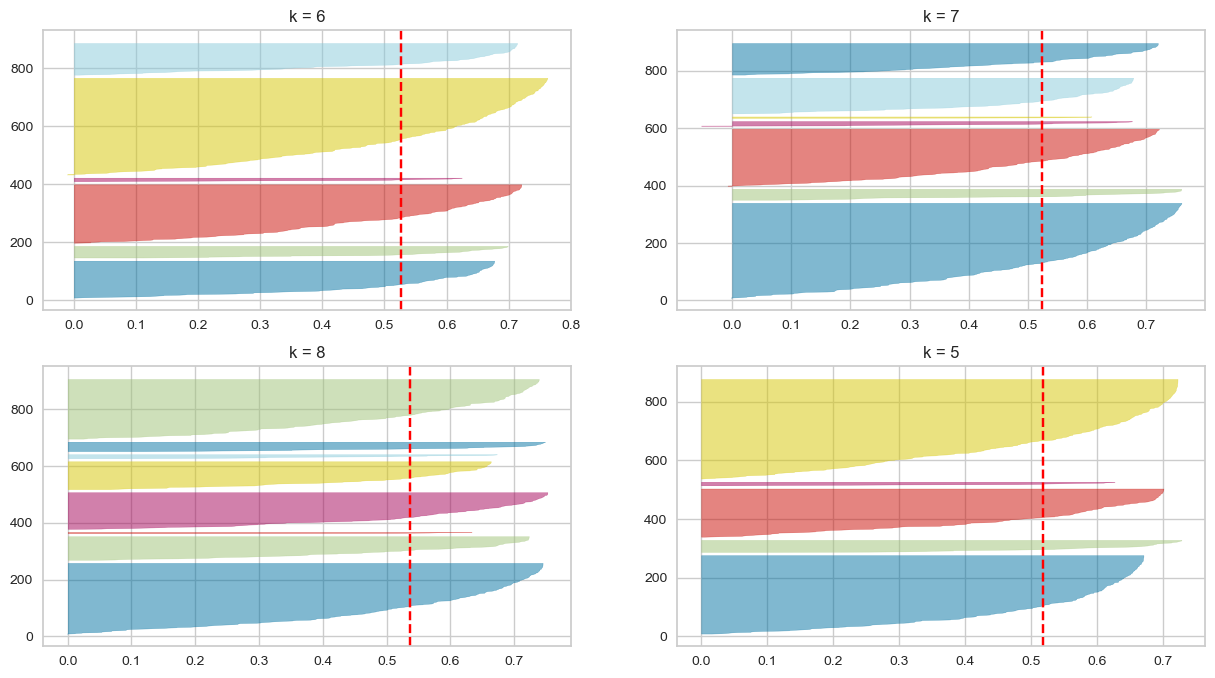

In [302]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
j=0
for i in [5,6,7,8]:#[3, 4, 6, 10]:
    j += 1
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(j, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    ax[q-1][mod].set_title("k = " + str(i))
    visualizer.fit(df_clustering[numvar])


## Numeric and Categorical clustering

Since we made a lot of work to predic a mood and some genre, we must try to use those categorical variables, which we can't do with K-Means.
So first I based the following code on [Jorge Martin Lasaosa post](https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad) about Gower Distance, check it out.

Gower distance $ ps_{ij}^{(f)} $ between $i$ and $j$ for the variable $f$ is : 
- for a numeric type : $ ps_{ij}^{(f)} = 1 - |x_{if}-x_{jf}|/R_{f} $ avec $ R_f = \max f - \min f $
- For a categorical feature, the partial similarity between two individuals is one only when both observations have exactly the same value for this feature. Zero otherwise.

In [268]:
import gower

In [269]:
# we compute this distance explained above
distance_matrix = gower.gower_matrix(df_clustering)

In [270]:
pd.DataFrame(distance_matrix).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,818,819,820,821,822,823,824,825,826,827
809,0.475051,0.274428,0.271930,0.141331,0.390717,0.441638,0.221926,0.314120,0.435386,0.249152,...,0.194981,0.073160,0.091726,0.210113,0.168026,0.217197,0.379138,0.112216,0.152429,0.063274
368,0.366922,0.397094,0.424658,0.307458,0.260171,0.446675,0.356798,0.416832,0.406921,0.409337,...,0.364108,0.343843,0.357432,0.407055,0.389560,0.342092,0.462184,0.229109,0.350522,0.305039
736,0.303808,0.255424,0.290774,0.222726,0.358138,0.334542,0.264863,0.177774,0.435065,0.249064,...,0.280270,0.200711,0.250894,0.145970,0.176794,0.370518,0.302193,0.236844,0.195068,0.236817
592,0.264100,0.183567,0.187190,0.258846,0.276414,0.223251,0.175462,0.197842,0.159340,0.173531,...,0.287465,0.365789,0.378229,0.314684,0.361382,0.296377,0.275207,0.378281,0.345434,0.342721
808,0.328251,0.163568,0.158299,0.244929,0.446528,0.285158,0.136031,0.158971,0.309213,0.135088,...,0.287579,0.289591,0.303666,0.230958,0.181209,0.201747,0.181334,0.275643,0.236476,0.267584
561,0.372978,0.355288,0.404251,0.271860,0.152245,0.335487,0.363717,0.312177,0.377733,0.389713,...,0.303052,0.371510,0.399975,0.387909,0.425997,0.396510,0.401878,0.336208,0.313463,0.349059
404,0.209794,0.450447,0.395898,0.440529,0.229336,0.296375,0.422168,0.377397,0.284314,0.405061,...,0.468941,0.495350,0.492435,0.456646,0.483817,0.491918,0.508015,0.480706,0.500029,0.528588
293,0.324231,0.227882,0.203961,0.238145,0.235390,0.267439,0.218106,0.266615,0.168379,0.204305,...,0.216201,0.316700,0.285227,0.304072,0.333172,0.324636,0.360087,0.336279,0.328079,0.315323
608,0.414893,0.346840,0.298596,0.194104,0.285852,0.359540,0.273049,0.315190,0.380040,0.296719,...,0.230862,0.245695,0.254997,0.341497,0.337789,0.277959,0.411102,0.182724,0.304665,0.255903
374,0.131973,0.216655,0.223255,0.302483,0.309101,0.290022,0.228304,0.153805,0.314918,0.233307,...,0.354024,0.379177,0.426584,0.327503,0.357688,0.293902,0.256945,0.396487,0.354500,0.410392


### Avec clustering DBScan

In [293]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN

#km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
dbscan_cluster = DBSCAN(eps=0.11, 
                    min_samples=2, 
                    metric="precomputed")
q, mod = divmod(j, 2)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(dbscan_cluster, colors='yellowbrick', ax=ax[q-1][mod])
ax[q-1][mod].set_title("k = " + str(i))
dbscan_cluster.fit(distance_matrix)


DBSCAN(eps=0.11, metric='precomputed', min_samples=2)

In [294]:
df_clustering["cluster"] = dbscan_cluster.labels_

C:\Users\leopo\AppData\Local\Temp\ipykernel_32108\2529867548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering["cluster"] = dbscan_cluster.labels_


In [295]:
df_clustering['cluster'].nunique()

10

In [296]:
len(df_clustering[df_clustering['cluster']==-1])

41

In [298]:
len(df_clustering[df_clustering['cluster']==0])

762

In [300]:
len(df_clustering[df_clustering['cluster']==1])

3

In [299]:
df_clustering.sample(20)

,popularity,length,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,...,mood,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",cluster
7,26,158432,0.103000,0.518,0.513,0.000013,0.1780,0.4280,-9.394,0.0470,...,sad,False,False,False,False,True,False,True,False,0
540,38,197350,0.000748,0.513,0.684,0.000337,0.0947,0.4310,-5.562,0.0440,...,happy,False,False,False,False,False,False,False,False,0
424,44,253706,0.005130,0.697,0.629,0.387000,0.1530,0.1700,-6.976,0.0328,...,sad,False,False,False,False,False,True,False,False,0
703,51,273226,0.000006,0.458,0.984,0.515000,0.0678,0.3810,-4.294,0.1500,...,energy,False,False,False,False,True,False,True,False,0
582,23,191720,0.000606,0.867,0.400,0.000117,0.0610,0.8040,-5.319,0.0512,...,happy,False,True,True,False,False,False,True,True,0
476,44,222986,0.814000,0.634,0.258,0.000000,0.2020,0.4040,-9.201,0.0736,...,sad,False,False,False,False,False,False,False,False,0
17,46,226253,0.000385,0.578,0.798,0.006140,0.1180,0.3110,-5.174,0.0367,...,happy,False,False,True,False,True,False,True,True,0
494,13,219200,0.000758,0.439,0.832,0.000050,0.3840,0.2720,-5.784,0.0377,...,happy,False,True,True,False,False,False,False,False,0
586,62,160720,0.740000,0.871,0.472,0.269000,0.1450,0.7070,-11.077,0.0756,...,happy,False,True,True,True,False,False,False,False,0
497,50,172613,0.440000,0.666,0.784,0.017500,0.0333,0.5450,-5.700,0.0391,...,happy,False,True,True,False,True,False,False,False,0


plutôt échec : tout est dans le premier cluster

### Clustering not very accurate theoratically but why not

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarn

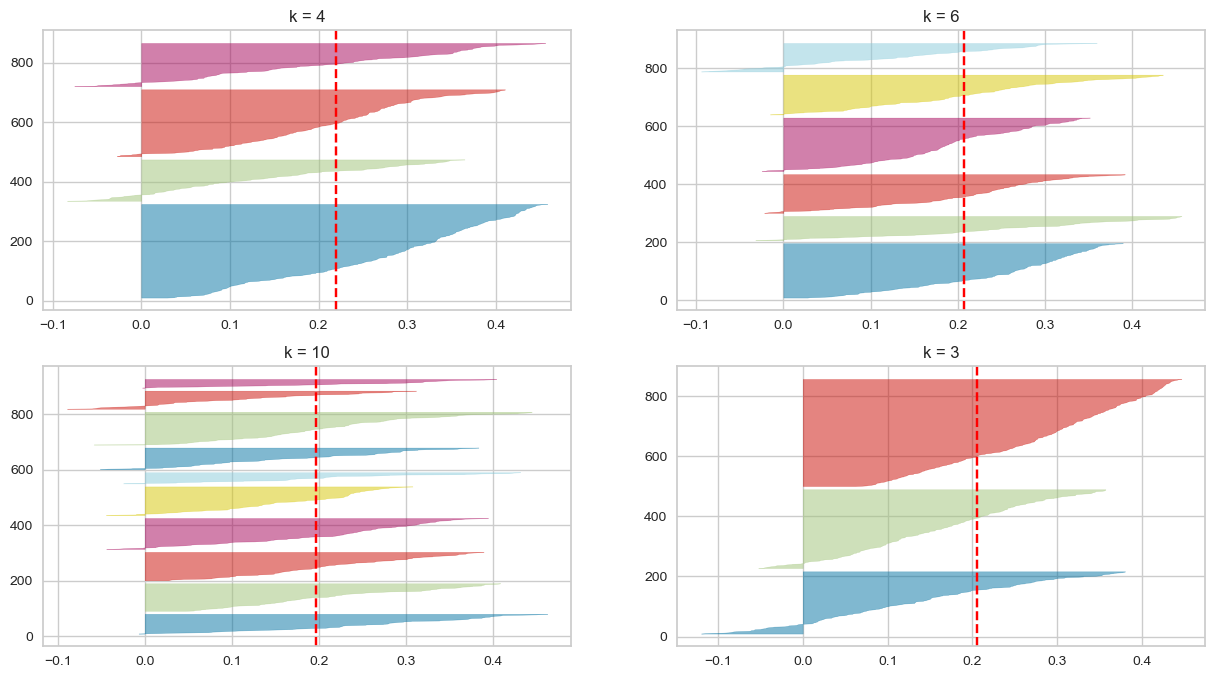

In [305]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
j=0
for i in [3, 4, 6, 10]:
    j += 1
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=1000, random_state=42)
    q, mod = divmod(j, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    ax[q-1][mod].set_title("k = " + str(i))
    visualizer.fit(distance_matrix)


In [306]:
choosen_model = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=2000, random_state=100)# 200,42

In [308]:
results = choosen_model.fit(distance_matrix)

c:\Users\leopo\anaconda3\envs\spotify\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [309]:
df_clustering['cluster'] = results.labels_

C:\Users\leopo\AppData\Local\Temp\ipykernel_32108\674743309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = results.labels_


In [318]:
for i in range(10):
    print(f"For the cluster {i}, there are {len(df_clustering[df_clustering['cluster']==i])} songs")

For the cluster 0, there are 81 songs
For the cluster 1, there are 104 songs
For the cluster 2, there are 119 songs
For the cluster 3, there are 109 songs
For the cluster 4, there are 74 songs
For the cluster 5, there are 96 songs
For the cluster 6, there are 32 songs
For the cluster 7, there are 128 songs
For the cluster 8, there are 50 songs
For the cluster 9, there are 35 songs


In [320]:
for i in range(10):
    display(df_playlist[df_clustering['cluster']==i].sample(3))

,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
370,2NJGAT43AvS7BQvn2017yS,Hey Moon,John Maus,We Must Become the Pitiless Censors of Ourselves,2011-06-28,48,248706,0.784,0.573,0.639,...,"[art pop, baroque pop, chillwave, experimental...",False,True,False,False,False,True,False,False,0
60,5NgflIIUfY2sfuntLtcbLN,Anchor,Rob Scallon,Anchor EP (Tour Edition),2016-07-26,41,231927,0.027,0.272,0.358,...,[instrumental bluegrass],False,False,False,False,False,False,False,False,0
36,4L3dE3pNQE3qcu1tO8y7f0,Unknown Frequency,Lucy In Disguise,Unknown Frequency,2018-03-02,19,310792,0.130,0.728,0.588,...,"[chillsynth, synthwave]",False,False,False,True,False,False,False,False,0


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
136,2769RhOZs0ezRncRW1vryp,Till Forever Falls Apart,Ashe,Till Forever Falls Apart,2021-03-02,67,222860,0.41300,0.509,0.498,...,"[alt z, electropop, pop, post-teen pop]",False,True,True,False,False,False,True,False,1
433,3B7w5pzxhGvIGg7UiELnFc,Trouble (I Don't Mind),Bibi Tanga & The Selenites,The Same Tree,2022-09-16,15,196733,0.00217,0.821,0.617,...,[electro jazz],True,False,True,False,False,False,False,False,1
53,3XdXixlx3MoVzfL7pu9hx6,Time,Arca,KiCk i,2020-06-26,49,165789,0.80000,0.548,0.322,...,"[ai, art pop, deconstructed club, escape room,...",False,True,True,False,False,True,False,False,1


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
656,4NwFxag85AYdCel47a3Yhi,Dawn Patrol - Remastered 2004,Megadeth,Rust In Peace (Expanded Edition),1990-10-04,46,111800,0.0212,0.669,0.709,...,"[alternative metal, hard rock, melodic thrash,...",False,False,False,False,True,False,True,False,2
2,7nbJsUjlooVHuyq2I1l7CT,80s Life,"The Good, the Bad & the Queen","The Good, The Bad and The Queen",2007-01-22,28,208213,0.4910,0.721,0.645,...,[modern alternative rock],False,False,False,False,True,False,True,False,2
694,6gBdHs7G01tgb52Nw3mjBJ,You Gotta Believe,Anthrax,For All Kings,2016-02-26,24,452399,0.0013,0.346,0.958,...,"[album rock, alternative metal, hard rock, met...",False,False,False,False,True,False,True,False,2


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
470,4Cizx5X0uI6GJBw5o0nP7W,Manège à trois,Hoshi,Il suffit d'y croire (Version deluxe),2018-11-30,47,236853,0.23300,0.530,0.694,...,"[francoton, french pop, variete francaise]",False,True,False,False,False,False,False,False,3
490,66MOo7lFd046ZJcfbppGXh,Un peu d’oxygène,Renard Tortue,Un peu d’oxygène,2021-05-28,22,214000,0.66200,0.725,0.429,...,[],False,False,False,False,False,False,False,False,3
742,69kZsoRrSf7GBTSdJ4BjqA,Another Day,Dream Theater,Images and Words,1992-06-30,54,263120,0.00223,0.454,0.614,...,"[neo classical metal, progressive metal]",False,False,False,False,False,True,False,False,3


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
247,3gcmn2CtOE9SjBevmvGVEk,D.A.N.C.E - Radio Edit,Justice,D.A.N.C.E,2007-04-30,54,211880,0.052300,0.591,0.961,...,"[alternative dance, electro house, electronica...",False,False,True,False,False,False,True,True,4
240,0iTpQYzJnYgh7kIxyq8A2O,Two Weeks,Grizzly Bear,Veckatimest,2009-05-24,69,243160,0.289000,0.537,0.712,...,"[alternative dance, art pop, baroque pop, broo...",False,True,False,True,True,False,True,True,4
259,3qel23hQWhHT3qGewBQ0pE,Men's Needs,The Cribs,"Men's Needs, Women's Needs, Whatever (Standard...",2007-05-12,48,195973,0.000102,0.547,0.944,...,"[british indie rock, britpop, indie rock, mode...",False,True,False,False,True,False,True,True,4


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
658,6VD3TMFZzbz1VVrSH02GxH,Pandemic,Devin Townsend Project,Deconstruction,2011-06-20,13,208840,0.000005,0.399,0.984,...,"[avant-garde metal, canadian metal, djent, pro...",False,False,False,False,False,True,False,False,5
731,6UmBIUiYwrRdnqyELbIshS,Digital Gerrymandering,Intronaut,The Direction of Last Things,2015-11-13,21,488613,0.000083,0.219,0.854,...,"[djent, jazz metal, post-doom metal, post-meta...",True,False,False,False,False,False,False,False,5
625,6ITIqtfQ2qVe5mKAuj4YgY,Effervescent! / True North - Live at The Round...,Devin Townsend Project,The Retinal Circus (Live),2013-09-30,10,383520,0.025100,0.377,0.639,...,"[avant-garde metal, canadian metal, djent, pro...",False,False,False,False,False,True,False,False,5


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
322,6oVSGylxmvyMNjAigujxeZ,"Prince Sidon's Theme (From ""The Legend of Zeld...",Celestial Aeon Project,Zelda Dreams,2020-08-28,6,125084,0.959,0.449,0.0923,...,"[commons, video game music]",False,False,False,False,False,False,False,False,6
342,0YeP4gSyzoUA8O09B0MBaF,The Sun In September,Matthew Halsall,Fletcher Moss Park,2012-10-15,42,470893,0.871,0.283,0.2400,...,"[contemporary jazz, indie jazz, jazz brass, nu...",True,False,False,False,False,False,False,False,6
308,1Rd5OVjqDAr5xC96MHt448,Daydreaming,Radiohead,A Moon Shaped Pool,2016-05-08,58,384438,0.968,0.214,0.2630,...,"[alternative rock, art rock, melancholia, oxfo...",False,False,False,False,True,False,True,False,6


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
295,0qQdLFU91ylWRpiNKpqcWG,La montagne,Février,La montagne,2016-02-26,29,338582,0.51800,0.847,0.549,...,[],False,False,False,False,False,False,False,False,7
129,25SJaCCPiosugnlY53VhRG,Freaking Out the Neighborhood,Mac DeMarco,2,2012-10-16,0,173888,0.06390,0.565,0.832,...,"[edmonton indie, lo-fi indie]",False,False,False,False,False,False,False,False,7
275,5swpOLPDXoYG8wctIM8wFH,Call me,Sarah Rebecca,Sarah Rebecca,2020-06-19,37,183625,0.00162,0.524,0.741,...,[],False,False,False,False,False,False,False,False,7


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
318,7IAGZpMEBO143Y7zZ17KsH,Toucan Ocean,Jon Hassell,Vernal Equinox (Remastered),1977,29,229861,0.932,0.580,0.403,...,"[ambient, art pop, art rock, compositional amb...",True,True,False,False,True,True,False,False,8
387,7ICvghdB5j8rAfMaP6WJKC,About You,The Jesus and Mary Chain,Original Album Series,2009,4,153413,0.683,0.364,0.420,...,"[alternative rock, art rock, new wave, noise p...",False,True,False,False,True,False,True,False,8
357,0eVz3hV2xOXdneGpnWDFpb,Sugar for the Pill,Slowdive,Slowdive,2017-05-05,59,270918,0.209,0.534,0.536,...,"[alternative rock, art pop, dream pop, nu gaze...",False,True,False,True,True,False,True,False,8


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
724,1r6TLzCsDdBTv64jPB4C0V,Red Giant,Haken,Affinity (Deluxe Edition),2016-04-29,12,366106,0.016900,0.240,0.660,...,"[deep progressive rock, jazz metal, progressiv...",True,False,False,False,True,True,False,False,9
709,1PV5b6Uc5PqL5L2PRg9uYJ,The Good Doctor,Haken,Vector (Deluxe Edition),2018-10-26,16,235973,0.000119,0.396,0.891,...,"[deep progressive rock, jazz metal, progressiv...",True,False,False,False,True,True,False,False,9
753,02v81HQA1yS0DSZ4dw3YzF,Atlas Novus,Scale The Summit,The Migration,2013-06-11,38,307106,0.013100,0.488,0.840,...,"[djent, instrumental math rock, instrumental p...",True,False,False,False,True,True,False,False,9


rien qu'avec ces extraits on peut voir que cela a fonctionné moyen, notamment on peut voir par exemple the goods, the bad and the queen dans le trash métal ou dream theater dans des trucs assez doux.

Essayons la méthode de brute mais avec d'autres méthode de clusterings

In [330]:
#from sklearn.cluster import SpectralClustering essayé fonctionne très mal
from sklearn.cluster import AffinityPropagation

In [331]:
#choosen_model = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=2000, random_state=100)# 200,42
choosen_model = AffinityPropagation(damping = 0.5, affinity='precomputed', max_iter=1000)
# idée assigné des points au musique en fonction de mon nombre d'écoute => voir la doc dans preference

In [332]:
results = choosen_model.fit(distance_matrix)

In [333]:
df_clustering['cluster'] = results.labels_

C:\Users\leopo\AppData\Local\Temp\ipykernel_32108\674743309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = results.labels_


In [340]:
df_clustering['cluster'].nunique()

18

In [336]:
for i in range(10):
    print(f"For the cluster {i}, there are {len(df_clustering[df_clustering['cluster']==i])} songs")


For the cluster 0, there are 12 songs
For the cluster 1, there are 25 songs
For the cluster 2, there are 21 songs
For the cluster 3, there are 64 songs
For the cluster 4, there are 22 songs
For the cluster 5, there are 23 songs
For the cluster 6, there are 185 songs
For the cluster 7, there are 57 songs
For the cluster 8, there are 37 songs
For the cluster 9, there are 48 songs


In [343]:
df_clustering.groupby('cluster').sum()

C:\Users\leopo\AppData\Local\Temp\ipykernel_32108\1973429802.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clustering.groupby('cluster').sum()


,popularity,length,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave"
cluster,,,,,,,,,,,,,,,,,,,
0,352,3581136,3.789990,7.0410,7.96300,9.149000,1.3176,2.8711,-113.152,0.4612,1426.872,0,1,3,11,1,1,1,1
1,1016,8164688,1.239018,9.1420,20.47900,14.919100,4.4816,5.1632,-166.222,2.0144,2851.929,0,1,2,0,8,17,24,1
2,719,4577726,13.926360,12.1380,10.02700,10.432508,2.9926,10.2420,-240.967,1.1786,2556.618,1,14,2,10,1,3,1,1
3,1709,23474679,3.198017,23.8937,49.58360,28.116977,18.6205,14.5167,-449.396,4.4080,7887.360,3,1,2,1,1,43,8,1
4,844,5991080,12.283573,10.2790,10.08800,8.283369,3.8460,6.8254,-256.084,1.1924,2645.186,1,21,3,13,19,5,2,1
5,1089,6092951,3.459391,14.5940,16.49700,2.808606,3.9276,15.7076,-144.252,0.8725,2782.153,0,1,22,1,22,1,22,21
6,7919,41832691,28.563089,116.8033,126.31590,19.120905,33.7056,88.8806,-1270.431,13.1947,22788.042,1,150,75,23,6,2,54,41
7,2494,13228397,4.714490,29.8980,44.63490,6.549409,11.8770,29.1841,-344.963,4.5252,6414.119,1,2,1,3,46,1,54,12
8,991,9120632,3.097059,22.4990,25.75250,5.663710,5.6934,20.8280,-283.138,2.7285,4678.956,2,10,10,1,21,1,1,2


In [345]:
for i in range(df_clustering['cluster'].nunique()):
    display(df_playlist[df_clustering['cluster']==i].sample(5))

,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
37,6oJBMBhs2dsVmcH5Gw9KkE,Reach,Unfound,Anomaly,2019-02-14,36,405360,0.54500,0.561,0.801,...,[chillsynth],False,False,False,True,False,False,False,False,0
36,4L3dE3pNQE3qcu1tO8y7f0,Unknown Frequency,Lucy In Disguise,Unknown Frequency,2018-03-02,19,310792,0.13000,0.728,0.588,...,"[chillsynth, synthwave]",False,False,False,True,False,False,False,False,0
40,6GWrNgtyvNPaxOZFjf6JzK,アトラクション,t e l e p a t h テレパシー能力者,アンドロメダ,2014-11-25,30,164495,0.95500,0.515,0.332,...,"[dreampunk, hardvapour, slushwave, vaporwave]",False,False,False,True,False,False,False,False,6
43,6jncvG0hgEOMMEAXP9Sitf,Pictures of Purple Skies,Memorex Memories,Pictures of Purple Skies,2019-06-10,17,386437,0.79900,0.430,0.762,...,[chillsynth],False,False,False,True,False,False,False,False,6
555,7265oJ3p7UqlQ8S6RhCaCI,Zero Gravity - Above and Beyond Remix,Thylacine,OVNI(s) [Bande Originale de la Série],2021-01-08,36,439746,0.00414,0.554,0.816,...,"[laboratorio, synthesizer, vintage french elec...",False,False,True,True,False,False,False,False,0


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
688,4XPrEwXIu8UhlggytlSqPr,Pray,Gojira,Magma,2016-06-17,45,313866,0.001410,0.436,0.947,...,"[alternative metal, french death metal, french...",False,False,False,False,False,True,True,False,5
775,4lLmAGSX8UmRNc2NyAeQgO,Seventh Wave,Devin Townsend,Ocean Machine,1997-07-16,30,410693,0.000013,0.209,0.675,...,"[alternative metal, canadian metal, progressiv...",False,False,False,False,False,True,True,False,5
640,4PWxt9Fy949kUtkEi2GI5V,L'enfant sauvage,Gojira,L'Enfant Sauvage (Special Edition),2012-06-26,57,257733,0.000146,0.143,0.995,...,"[alternative metal, french death metal, french...",False,False,False,False,False,True,True,False,5
693,57caEZCym7upL7k7wt5h4o,Planned Obsolescence,Gojira,L'Enfant Sauvage (Special Edition),2012-06-26,36,279466,0.000037,0.280,0.899,...,"[alternative metal, french death metal, french...",False,False,False,False,False,True,True,False,5
738,4LB264fAdV4BPK99w4UMxl,Demiurge,Meshuggah,Koloss,2012-02-09,52,372866,0.000033,0.207,0.945,...,"[alternative metal, djent, nu metal, progressi...",False,False,False,False,False,True,True,False,5


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
396,0I9Xtmb9a1ej3oJIcnjyLS,Gold Dust,Duster,Stratosphere,1998-02-24,0,125933,0.863,0.580,0.470,...,"[indie pop, slowcore]",False,True,False,False,False,False,False,False,0
241,3GyzPfywfhUx4VaurgUzLg,The Greatest,Cat Power,The Greatest / Hate,2005-12-06,12,203560,0.698,0.517,0.370,...,"[art pop, dream pop, indie pop, melancholia, s...",False,True,False,True,False,False,False,False,1
316,1ZBxqoho42uvFAJB6d2RdS,Whisky Story Time,Alabaster DePlume,To Cy & Lee: Instrumentals Vol. 1,2020-02-28,39,139586,0.994,0.380,0.187,...,"[art pop, chamber psych, indie folk, pastoral,...",True,True,False,False,False,False,False,False,6
400,0aHHMatRvp6oJdVzdxgHAD,Darling Effect,Insides,Euphoria,1993-11-08,23,303066,0.917,0.507,0.220,...,"[ambient pop, dream pop]",False,True,False,True,False,False,False,False,8
370,2NJGAT43AvS7BQvn2017yS,Hey Moon,John Maus,We Must Become the Pitiless Censors of Ourselves,2011-06-28,48,248706,0.784,0.573,0.639,...,"[art pop, baroque pop, chillwave, experimental...",False,True,False,False,False,True,False,False,0


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
750,4UPK015h5n7ZasIu0Ha7Lk,Language I: Intuition,The Contortionist,Language I: Intuition,2014-07-15,7,324106,0.014300,0.304,0.737,...,"[deathcore, djent, progressive post-hardcore, ...",False,False,False,False,False,True,False,False,5
815,2A8UtF8DLjl0UiceTSVksc,Petit peuple - chanté par Francis Petit,Warning,Métamorphose,2015-02-16,7,270400,0.000158,0.454,0.729,...,[doom metal],False,False,False,False,False,False,False,False,3
819,1pJb8nD3EKdE1DjyZnJZgr,Gone,Ancestors,Suspended in Reflections,2018-08-24,9,344813,0.000497,0.318,0.701,...,"[post-metal, progressive doom]",False,False,False,False,False,True,False,False,5
756,2VHJyti0qEEVm1QL5HE25G,Arrow + Knee = Adventure Over,Various Artists,Songs in the Key of D,2012-03-27,5,280189,0.000039,0.328,0.913,...,"[djent, instrumental djent, progressive jazz f...",True,False,False,False,False,True,False,False,9
630,5Ila5K5xzsc5qW3odBAa5f,Juular,Devin Townsend Project,Deconstruction,2011-06-20,30,225986,0.000078,0.477,0.982,...,"[avant-garde metal, canadian metal, djent, pro...",False,False,False,False,False,True,False,False,5


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
393,2oeLt7N1amHZiev27FvKE2,Sketch for Summer,The Durutti Column,The Return of The Durutti Column,1979-01-01,53,178280,0.484,0.648,0.743,...,"[art pop, art rock, dream pop, experimental, f...",False,True,False,True,True,True,False,False,8
198,1yFVDdyWGDyIi47PiEFYAL,All That,Sparks,"A Steady Drip, Drip, Drip",2020-05-15,31,284306,0.345,0.594,0.570,...,"[art rock, glam rock, new romantic, new wave, ...",False,True,False,True,True,False,False,False,8
372,34LohAliZ2QKydqVJcFpwV,Sleep Apnea,Beach Fossils,Clash the Truth,2013-02-19,0,146293,0.145,0.553,0.685,...,"[brooklyn indie, chillwave, dream pop, dreamo,...",False,True,False,True,True,False,False,False,8
475,4dtG1p71E6VPt9BmVYWcY5,Mais je t'aime,Grand Corps Malade,Mais je t'aime,2020-06-19,53,268243,0.784,0.451,0.410,...,"[chanson, francoton, french pop, french rock, ...",False,True,False,False,True,False,False,False,8
244,1WBSFlSLyOZnSa8fj7a5yC,Nantes,Beirut,The Flying Club Cup,2007-10-08,61,230200,0.781,0.434,0.531,...,"[albuquerque indie, baroque pop, chamber pop, ...",False,True,False,False,True,False,False,False,1


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
103,3jaOfXYnWg49JrTZnrryx4,Medicine,Broken Bells,After the Disco,2014-01-13,40,208693,0.180000,0.765,0.686,...,"[alternative dance, alternative rock, indie ro...",False,False,True,False,True,False,True,True,4
97,5KBU7oxkNJ0hDGby9A1plU,After the Disco,Broken Bells,After the Disco,2014-01-07,30,219293,0.002260,0.729,0.740,...,"[alternative dance, alternative rock, indie ro...",False,False,True,False,True,False,True,True,4
100,1TefJ43egrnGQfvBvAcZvQ,The Changing Lights,Broken Bells,After the Disco,2014-01-13,35,228546,0.286000,0.668,0.764,...,"[alternative dance, alternative rock, indie ro...",False,False,True,False,True,False,True,True,4
580,4iG2gAwKXsOcijVaVXzRPW,Time to Pretend,MGMT,Oracular Spectacular,2007-12-14,71,261000,0.000087,0.438,0.940,...,"[alternative dance, indietronica, modern rock,...",False,False,True,False,True,False,True,True,4
559,7nNyOfMS79SwXWum8XHnJa,Skeleton Boy,Friendly Fires,Friendly Fires,2008-09-01,40,213640,0.005890,0.618,0.915,...,"[alternative dance, dance rock, indietronica, ...",False,False,True,False,True,False,True,True,4


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
466,6sUHWMr7bvxaVYAg8gaykT,T'as vu,Clio,T'as vu,2018-10-12,3,241053,0.096000,0.721,0.640,...,"[french indie pop, french synthpop, nouvelle c...",False,True,False,True,False,False,False,False,1
116,2lzm1dP4bqqYpRGZTkan2k,Baby It's You,London Grammar,Californian Soil,2021-04-16,35,242239,0.085700,0.501,0.823,...,"[metropopolis, nottingham indie]",False,True,False,False,False,False,False,False,7
127,5N7NLLGdrTy4QYuyM6ewm0,Californian Soil,London Grammar,Californian Soil,2021-04-16,41,221387,0.166000,0.472,0.566,...,"[metropopolis, nottingham indie]",False,True,False,False,False,False,False,False,3
170,5F5teCANREmowS93evH15M,Comment je vais faire,Hoshi,Il suffit d'y croire (Version deluxe),2018-11-30,45,234626,0.034800,0.550,0.645,...,"[francoton, french pop, variete francaise]",False,True,False,False,False,False,False,False,3
188,1YhzlKAGZCgFmu3maqDQtl,My Delirium,Ladyhawke,Ladyhawke (Deluxe Edition),2009-04-10,53,254480,0.000697,0.456,0.802,...,"[alternative dance, electroclash, electropop, ...",False,True,True,True,False,False,True,True,4


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
385,5EF87hLSOIO0oV17sHa4SC,Two Step,Throwing Muses,The Real Ramona,1991-02-18,27,276506,0.446000,0.463,0.585,...,"[alternative pop, alternative rock, boston roc...",False,True,False,True,True,False,True,False,8
246,3DQVgcqaP3iSMbaKsd57l5,I Bet You Look Good On The Dancefloor,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",2006-01-29,73,173680,0.002250,0.535,0.948,...,"[garage rock, modern rock, permanent wave, roc...",False,False,False,False,True,False,True,False,2
807,6W21LNLz9Sw7sUSNWMSHRu,Freak On a Leash,Korn,Follow The Leader,1998-08-18,75,255733,0.000022,0.353,0.898,...,"[alternative metal, funk metal, nu metal, rap ...",True,False,False,False,True,False,True,False,2
611,4Ztvl8C9Ld3IdHNo1a3UBe,Cheerleader Effect,Carpenter Brut,Leather Teeth,2018-02-23,39,217760,0.006850,0.552,0.845,...,"[cyberpunk, darksynth, synthwave]",False,False,False,True,False,False,False,False,7
305,7hApGgP4BCDPUzJNlsnUxz,Hang Me Up to Dry,Cold War Kids,Robbers & Cowards,2007-02-05,41,218786,0.017800,0.507,0.918,...,"[alternative rock, indie rock, modern alternat...",False,False,False,False,True,False,True,False,2


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
680,5brwuY7q1UM3ay3bZmZ0Qb,Way to Rome,Mars Red Sky,Mars Red Sky,2011-04-11,26,318640,0.023600,0.397,0.436,...,"[french stoner rock, instrumental stoner rock,...",False,False,False,False,True,False,False,False,3
778,3c272JQ5S83nlQ8rjrK5Ur,Interdimensional Summit,Dimmu Borgir,Eonian,2018-05-04,46,279148,0.000022,0.454,0.969,...,"[black metal, melodic death metal, metal, norw...",False,False,False,False,False,False,False,False,7
587,6CrDfmvHCyTJOoV8kEfnXS,Sometimes,Les Rythmes Digitales,Darkdancer,2005-09-04,31,297040,0.005680,0.761,0.726,...,[],False,False,False,False,False,False,False,False,7
256,0QhPgRMmfVYFCQIVEVST5i,F.E.A.R.,Ian Brown,The Greatest,2005-09-12,16,270026,0.298000,0.537,0.648,...,"[britpop, madchester, rock, solo wave, warring...",False,True,False,False,True,False,False,False,3
534,7uxTHC9nFpd4bYWlX5hdl1,La Plage,Ephese,La Plage,2018-06-28,4,219153,0.006960,0.657,0.735,...,[],False,False,False,False,False,False,False,False,7


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
252,6q6PeTloTbL2vb1Gt9sQQc,Ready For The Floor,Hot Chip,Made In The Dark,2008-01-21,57,234240,0.00903,0.764,0.759,...,"[alternative dance, art pop, dance rock, elect...",False,True,True,True,True,False,True,True,4
361,7vPHiwgCOAjSBRjAirbMvS,"Sea, Swallow Me",Cocteau Twins,The Moon and the Melodies,1986-11-10,69,189040,0.58900,0.454,0.673,...,"[alternative rock, art pop, art rock, dream po...",False,True,False,True,True,False,True,False,8
441,4Q6K6M0HSiRboY3C97AxD4,Let's Have A Kiki,Scissor Sisters,Magic Hour,2012-01-01,51,229840,0.10600,0.795,0.836,...,"[dance pop, dance rock, electropop]",False,True,True,False,True,False,False,True,4
497,0ZH2Ve6Ns1kzEMWunJoAek,Sacatela,La Femme,Teatro Lúcido,2022-11-04,50,172613,0.44000,0.666,0.784,...,"[french indie pop, french indietronica, french...",False,True,True,False,True,False,False,False,1
8,1yAlaq7nwPvbOvzjSsxoI1,Holes,Electric Guest,Mondo,2012-04-23,23,165773,0.07350,0.703,0.446,...,"[alternative dance, indie rock, indietronica, ...",False,True,True,False,True,False,True,True,4


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
16,6ggJ6MceyHGWtUg1KLp3M1,Risingson,Massive Attack,Mezzanine,1998-01-01,50,298826,0.02420,0.521,0.892,...,"[big beat, downtempo, electronica, trip hop]",False,False,True,False,False,False,False,False,0
523,6sO5U8T0f20z1fDKERL4gv,Danser ou crever,Clair,Danser ou crever,2020-07-08,13,225973,0.05160,0.813,0.692,...,[],False,False,False,False,False,False,False,False,7
74,7oUl2ZgCBvZ7xTIAdpFP2F,Tigress,H-Burns,Midlife,2019-03-29,37,207133,0.17600,0.607,0.760,...,[french indie folk],False,False,False,False,False,False,False,False,7
381,297hLyUr4DmZ4NjhsQ30nA,Don't Let Go - 12” Version,Pink Industry,New Naked Technology 2010 Remasters,2010-08-10,34,244973,0.03670,0.651,0.841,...,[minimal wave],False,False,False,False,False,False,False,False,7
427,67d3V45kYKxTyaPYRwuv2O,El Mundo,Ibrahim Maalouf,Capacity to Love,2022-11-04,40,207846,0.00811,0.697,0.510,...,"[arabic jazz, french jazz, jazz trumpet]",True,False,False,False,False,False,False,False,7


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
758,6H147Bkvdcxn7ONC99Eq6d,I'm Awake,Intervals,The Shape of Colour,2015-12-04,42,238503,0.000040,0.392,0.962,...,"[djent, instrumental djent, instrumental rock]",False,False,False,False,True,False,False,False,2
637,6onvGXO4kgOAIQNaD2de0D,Universal Flame,Devin Townsend Project,Z²,2014-10-28,35,279973,0.000035,0.432,0.931,...,"[avant-garde metal, canadian metal, djent, pro...",False,False,False,False,False,True,False,False,5
732,6M4h6Y9aft9icQR5nuvSTy,Dendrofil for Yggdrasil,Kvelertak,Nattesferd,2016-05-13,18,340080,0.000010,0.104,0.964,...,"[black 'n' roll, black thrash, norwegian metal...",False,False,False,False,True,False,False,False,9
676,0MArALOXhkdFx3j8mOBD6W,Heksebrann,Kvelertak,Nattesferd,2016-05-13,22,545266,0.000004,0.192,0.890,...,"[black 'n' roll, black thrash, norwegian metal...",False,False,False,False,True,False,False,False,0
739,1ZR4QAYsiO9zPsGaMPW2OI,The Enemy Inside,Dream Theater,Dream Theater,2013-09-16,49,377373,0.000012,0.488,0.976,...,"[neo classical metal, progressive metal]",False,False,False,False,False,True,False,False,5


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
90,1aYKlADXcLdEdBPlJHD0h5,Alone at Sea,The Pineapple Thief,Magnolia,2014-09-15,38,320786,0.000053,0.658,0.684,...,"[alternative metal, modern progressive rock, n...",False,False,False,False,True,True,True,False,2
712,0llT9QWibKuIHBX3jGV85L,Dark Charade,Rishloo,Living as Ghosts With Buildings as Teeth,2014-12-08,26,646000,0.066900,0.292,0.821,...,"[alternative metal, progressive metal]",False,False,False,False,False,True,True,False,5
626,6Xcw4Rqws76dH3tigoqY2o,Night,Devin Townsend,Ocean Machine,1997-07-16,25,285360,0.000004,0.350,0.979,...,"[alternative metal, canadian metal, progressiv...",False,False,False,False,False,True,True,False,5
304,20K1GR4VcRUVoLLBNHxNcE,Lucky - edit,Two Door Cinema Club,Lucky,2022-07-28,48,196592,0.012300,0.539,0.879,...,"[indietronica, irish rock, modern rock, northe...",False,False,True,False,True,False,True,False,2
303,3faSEhyR26vllPZKyI5tGg,Lucky,Two Door Cinema Club,Lucky,2022-07-28,38,219534,0.009020,0.529,0.879,...,"[indietronica, irish rock, modern rock, northe...",False,False,True,False,True,False,True,False,2


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
430,3acmo6HflOsvrpTd3XJ0tn,This Train,Wax Tailor,In the Mood for Life,2009-09-14,39,236520,0.435,0.664,0.691,...,"[electronica, hip-hop experimental, ninja, nu ...",True,False,True,False,False,True,False,False,9
373,0DXsPlfQtOQBFbL0wAaOn6,Blue Thunder,Galaxie 500,On Fire,1989-09-01,39,229813,0.320,0.330,0.566,...,"[alternative rock, dream pop, indie rock, lo-f...",False,True,False,True,True,False,True,False,8
360,5L2STOBiS00u7q4aLtRjKK,Nowhere Near,Yo La Tengo,Painful,1993-10-05,49,363973,0.832,0.431,0.233,...,"[alternative rock, anti-folk, art pop, dream p...",False,True,False,True,True,False,True,False,8
399,0Sr9uJqXFAvqHcgwg3UjY5,Slide Away - 2016 Remastered,The Verve,A Storm In Heaven (2016 Remastered / Deluxe),1993-06-21,43,243453,0.017,0.306,0.635,...,"[alternative rock, britpop, permanent wave, po...",False,True,False,False,True,False,True,False,2
13,4mLMabNijyaIvn7xuYe5kw,Dark Spring,Beach House,7,2018-05-11,35,204373,0.169,0.442,0.852,...,"[baltimore indie, dream pop, dreamo, modern dr...",False,True,False,True,False,False,True,False,8


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
93,2RlgNHKcydI9sayD2Df2xp,Mr. Blue Sky,Electric Light Orchestra,Out of the Blue,1977,79,303373,0.652000,0.388,0.338,...,"[album rock, art rock, beatlesque, classic roc...",False,False,False,False,True,False,False,False,3
77,50M7nY1oQuNHecs0ahWAtI,I Need My Girl,The National,Trouble Will Find Me,2013-05-20,64,245240,0.865000,0.520,0.436,...,"[indie rock, modern rock]",False,False,False,False,True,False,True,False,2
796,21pZBpd9XgAmJQFnBeLIKV,Empress Rising,Monolord,Empress Rising,2014-04-01,38,739447,0.000216,0.255,0.608,...,"[doom metal, instrumental stoner rock, post-do...",False,False,False,False,True,False,False,False,0
716,2fHExaI0RzUuB3xrCYT7rP,The Day After,Riverside,Wasteland,2018-09-28,37,108093,0.186000,0.407,0.124,...,"[alternative metal, neo-progressive, polish pr...",False,False,False,False,True,True,True,False,9
715,4PwobFPR5rM5glbyLTOhmJ,Lament,Riverside,Wasteland,2018-09-28,29,368812,0.526000,0.520,0.424,...,"[alternative metal, neo-progressive, polish pr...",False,False,False,False,True,True,True,False,9


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
513,33Dk1eCqzRLd21xEt6VazH,Sous la Vague,AGAPE,Sous la Vague,2019-05-28,4,236320,0.428,0.8230,0.634,...,[],False,False,False,False,False,False,False,False,3
148,6woxbl0VUW6fmowjeSAiZp,Forest Fire,Brighton,Forest Fire,2014-02-07,45,231405,0.107,0.5860,0.388,...,[],False,False,False,False,False,False,False,False,3
531,3leRWcNhwhJUigZi3TO52I,Numéro uno,Première Fois,Numéro uno,2019-04-30,3,186666,0.509,0.7080,0.749,...,[nantes indie],False,False,False,False,False,False,False,False,7
352,4WtolB2MyxiPmCupNhulsX,VIII. Juliet,Bonobo,Late Night Tales: Bonobo,2013-11-17,23,199813,0.992,0.0837,0.067,...,[],False,False,False,False,False,False,False,False,6
137,4oj6771Z2ncgL77onaRvzX,Into the Past,Mods,Into the Past,2021-02-25,7,230943,0.155,0.6340,0.493,...,[],False,False,False,False,False,False,False,False,0


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
122,5pjWzUc1tVcewUTdDJd6Ce,San Francisco Street,Sun Rai,Pocket Music,2013-06-11,60,266704,0.2240,0.877,0.542,...,[],False,False,False,False,False,False,False,False,3
608,5J826h9Aw7ghRyVKSKknSF,Minuit,Jumo,C'est déjà demain,2019-09-19,7,203128,0.2860,0.623,0.754,...,"[french indietronica, new french touch, vapor ...",False,False,True,False,False,False,False,False,0
366,0ZibOOMZvxb78LLTzkogKL,The Hostess,E Ruscha V,Who Are You,2017-11-03,43,124265,0.9810,0.506,0.259,...,[organic electronic],False,False,True,False,False,False,False,False,0
19,67Hna13dNDkZvBpTXRIaOJ,Teardrop,Massive Attack,Mezzanine,1998-01-01,70,330773,0.0173,0.615,0.419,...,"[big beat, downtempo, electronica, trip hop]",False,False,True,False,False,False,False,False,3
94,2Nq8gEPSjszcePWB7hS1zb,"Sans cesse, mon chéri",Domenique Dumont,Miniatures de auto rhythm,2018-10-01,50,247317,0.7020,0.871,0.540,...,"[fluxwork, fourth world]",False,False,False,False,False,False,False,False,7


,id,name,artist,album,release_date,popularity,length,acousticness,danceability,energy,...,genre,"jazz,funk",pop,"electro,techno,club,tronica","synth,dream",rock,"prog,exp","alt,modern","dance,rave",clusterid
27,5UBBJnFxsfjFxfrtvErQoH,Crystalised,The xx,xx,2009-08-16,67,201946,0.812000,0.762,0.484,...,"[downtempo, dream pop, indietronica]",False,True,True,True,False,False,False,False,1
512,2alxvMSDA2U6qEmrEEINfe,Giscard d'Estaing,Dombrance,Giscard d'Estaing,2019-05-03,43,232800,0.300000,0.613,0.626,...,"[french indie pop, french indietronica]",False,True,True,False,False,False,False,False,1
586,0Rqwa6i410IwhTiugt6vXi,Islands,The xx,xx,2009-08-16,62,160720,0.740000,0.871,0.472,...,"[downtempo, dream pop, indietronica]",False,True,True,True,False,False,False,False,1
723,2evgupPTGARAdhWLzTJe50,The Architect,Haken,Affinity (Deluxe Edition),2016-04-29,16,940120,0.000991,0.309,0.905,...,"[deep progressive rock, jazz metal, progressiv...",True,False,False,False,True,True,False,False,9
203,2Es6VkmBp0gyFoRTfpEd5W,Room with a View,Rone,Room with a View,2020-04-24,41,210911,0.746000,0.448,0.406,...,"[electronica, french indie pop, french indietr...",False,True,True,False,False,False,False,False,1
